In [72]:
# Importing the neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
sb.set()

# Problem definition: 
- ### What range will a student's score (low, medium or high) be given its attributes? </br>
> This is a classification problem as the students' scores are categorised into L, M and H.

# Sub-problems:
- ### Which Machine-Learning model is the best model to predict a student's score range?
- ### Which attribute influences a student's score most?
> The two sub-problems will be further expanded on in our machine learning notebook.

# Motivation:
- As university students interested in academic performance, predicting a student's grade may give us additional insight on what factors are most important when it comes to academic performance.

# Data

In [73]:
# Import 1st data set + glimpse of the data
df1 = pd.read_csv('xAPI-Edu-Data.csv')
df1

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [74]:
# Shape of the data set
print("Shape of Dataset: ",df1.shape)

Shape of Dataset:  (480, 17)


> Dataset contains 480 rows and 17 columns. </br>
> This means there a total of 480 students and 17 attributes including the score of students.

In [75]:
# Check null count and data type of each attribute
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

> It is noted that there are both categorical and numerical attributes in the dataset.

In [76]:
# Some of the attributes have random capitalisations. 
# Tidy up the column names
df1.rename(index=str, columns={'gender':'Gender', 'PlaceofBirth':'PlaceOfBirth', 'NationalITy':'Nationality',
'raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'}, inplace=True)

In [77]:
# Check column names
df1.columns

Index(['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [78]:
# Check missing values
df1.isna().sum()

Gender                      0
Nationality                 0
PlaceOfBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
RaisedHands                 0
VisitedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [79]:
# Check for duplicate entries
dupid_data = df1[df1.duplicated(keep = False)]
dupid_data.head()

# Removing the duplicates
df1.drop_duplicates(inplace=True,keep='first')
df1.reset_index(inplace=True,drop=True)

# Number of students
print("Number of students:", df1.shape[0])

# Check the index and number of rows
df1

Number of students: 478


,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
476,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


> Given 17 different attributes in total, it is very unlikely for two students to have the exact same data. </br>
> Therefore, the extra 2 points will be considered as duplicated and be removed. </br>
> This is to ensure the integrity of the data. 

# Exploratory Data Analysis on the Dataset

>The dataset we have used was obtained from **Kaggle**. </br>
>Description of the dataset, as available on Kaggle, is as follows.</br>
>To learn more about the attributes and the dataset : https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data

# Predictor variables:
>**1) Gender** - student's gender </br>
>**2) Nationality** - student's nationality </br>
>**3) Place of birth** - student's Place of birth </br>
>**4) Educational Stages** - educational level student belongs</br>
>**5) Grade Levels** - grade student belongs</br>
>**6) Section ID** - classroom student belongs </br>
>**7) Topic** - course topic </br>
>**8) Semester** - school year semester </br>
>**9) Parent responsible for student** - Mom or Dad </br>
>**10) Raised hand** - how many times the student raises his/her hand on classroom</br>
>**11) Visited resources** - how many times the student visits a course content</br>
>**12) Viewing announcements** - how many times the student checks the new announcements</br>
>**13) Discussion groups** - how many times the student participate on discussion groups </br>
>**14) Parent Answering Survey** - parent answered the surveys which are provided from school or not</br>
>**15) Parent School Satisfaction** - the Degree of parent satisfaction from school</br>
>**16) Student Absence Days** - the number of absence days for each student</br>

# Response variable:

>**17) Class** - the score range the student is placed in</br>

Students are classified into three categories based on their total grade/mark in the column 'Class':

>- 'L' - Low-Level: interval includes values from 0 to 69 </br>
>- 'M' - Middle-Level: interval includes values from 70 to 89 </br>
>- 'H' - High-Level: interval includes values from 90-100 </br>

The response variable shall be renamed to ScoreRange to avoid confusion.

# ScoreRange

In [80]:
# To make things less confusing, rename 'Class' to 'ScoreRange'
df1.rename(index=str, columns={'Class': 'ScoreRange'}, inplace=True)
df1.columns

Index(['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'ScoreRange'],
      dtype='object')

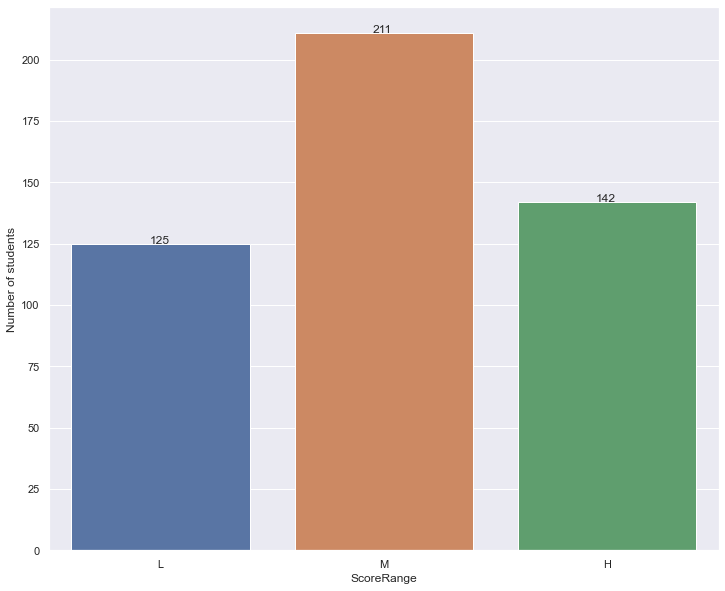

In [81]:
# Countplot of 'ScoreRange' to help visualise the numbers of students in different score range
f = plt.figure(figsize=(12,10))
f = sb.countplot(x='ScoreRange', data=df1, order=['L','M','H'])
f.set(ylabel='Number of students')
for bar in f.patches:
    f.annotate('{:d}'.format(bar.get_height()), (bar.get_x()+0.35, bar.get_height()+0.15))

>- 125 students are classified as low-level. </br>
>- 211 students are classified as medium-level. </br>
>- 142 students are classified as high-level. </br>

**Overall**, the distribution of students in the different ScoreRange looks normal.

# The Predictor Variables will be split into the following four main categories: </br>
> 1) Demographic </br>
> 2) Behavioral </br>
> 3) Academic </br>
> 4) Parental </br>


# 1) Demographic Predictor Variables
Now we will exclusively do EDA on **demographic features** to examine their relationships with ScoreRange.</br>
Demographic features include the following:
> 1. Gender
> 2. Nationality
> 3. PlaceOfBirth

We shall start by analysing Gender.

# Gender

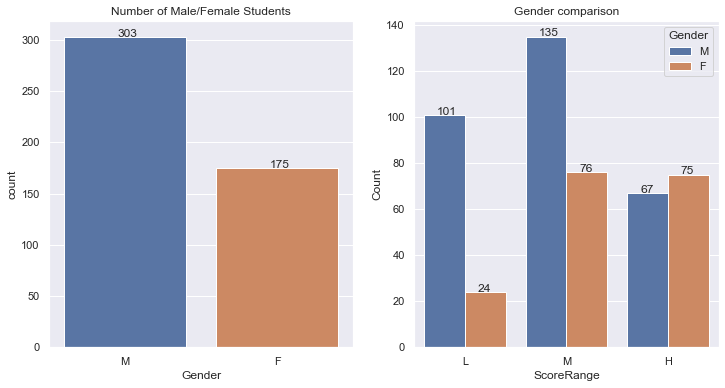

In [82]:
# Visualisation of gender using countplots

# Set up subplots
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot of Male and Female Students
h = sb.countplot(x='Gender',data=df1, ax=axes[0])
h.set_title("Number of Male/Female Students")
for bar in h.patches:
    h.annotate('{:d}'.format(bar.get_height()), (bar.get_x()+0.35, bar.get_height()+0.15))
    
# Gender Comparison
g = sb.countplot(x='ScoreRange', hue='Gender', data=df1, order=['L', 'M', 'H'], ax = axes[1])
g.set(xlabel='ScoreRange', ylabel='Count', title='Gender comparison')
for bar in g.patches:
    g.annotate('{:d}'.format(bar.get_height()), (bar.get_x()+0.125, bar.get_height()+0.15))
plt.show()

In [83]:
# Compute percentages of males and females are in L ScoreRange
fl = 24/175 * 100
ml = 101/305 * 100
print("Low-level comparison:")
print("Percentage of females in low-level (L) ScoreRange:", str(round(fl,2)) + "%")
print("Percentage of males in low-level (L) ScoreRange:", str(round(ml,2)) + "%")

# Compute percentages of males and females are in M ScoreRange
fm = 76/175 * 100
mm = 135/305 * 100
print ("\nMedium-Level comparison:")
print("Percentage of females in Medium-level (M) ScoreRange:", str(round(fm,2)) + "%")
print("Percentage of males in Medium-level (M) ScoreRange:", str(round(mm,2)) + "%")

# Compute percentages of males and females are in M ScoreRange
fh = 75/175 * 100
mh = 67/305 * 100
print ("\nHigh-Level comparison:")
print("Percentage of females in High-level (H) ScoreRange:", str(round(fh,2)) + "%")
print("Percentage of males in High-level (H) ScoreRange:", str(round(mh,2)) + "%")

Low-level comparison:
Percentage of females in low-level (L) ScoreRange: 13.71%
Percentage of males in low-level (L) ScoreRange: 33.11%

Medium-Level comparison:
Percentage of females in Medium-level (M) ScoreRange: 43.43%
Percentage of males in Medium-level (M) ScoreRange: 44.26%

High-Level comparison:
Percentage of females in High-level (H) ScoreRange: 42.86%
Percentage of males in High-level (H) ScoreRange: 21.97%


<function matplotlib.pyplot.show(close=None, block=None)>

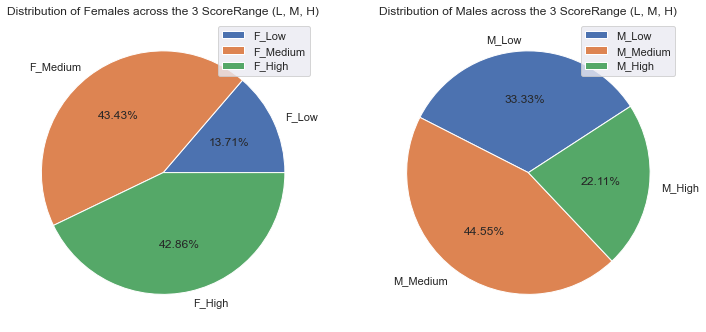

In [84]:
# Pie-chart to visualise the percentages
fig = plt.figure(figsize=(12,10))

# Female
ax1 = plt.subplot2grid((1,2),(0,0))
f_percentages = np.array([fl, fm, fh])
f_labels = ['F_Low','F_Medium', 'F_High']
f = plt.pie(f_percentages, labels = f_labels, autopct='%1.2f%%')
plt.title("Distribution of Females across the 3 ScoreRange (L, M, H)")
plt.legend()
plt.show

# Male
ax1 = plt.subplot2grid((1,2),(0,1))
m_percentages = np.array([ml, mm, mh])
m_labels = ['M_Low','M_Medium', 'M_High']
m = plt.pie(m_percentages, labels = m_labels, autopct='%1.2f%%', startangle=33)
plt.title("Distribution of Males across the 3 ScoreRange (L, M, H)")
plt.legend()
plt.show

### Insights:
>There are more male than female students. </br>
>There is a higher percentage of females that are in a medium/high-level class compared to males.</br>
>Males also dominate the low-level class, outnumbering females 5:1.</br>

**Therefore**, females perform better than males and Gender should be included in our prediction model.</br>

# Nationality

The different nationalities of students: 
KW
lebanon
Egypt
SaudiArabia
USA
Jordan
venzuela
Iran
Tunis
Morocco
Syria
Palestine
Iraq
Lybia


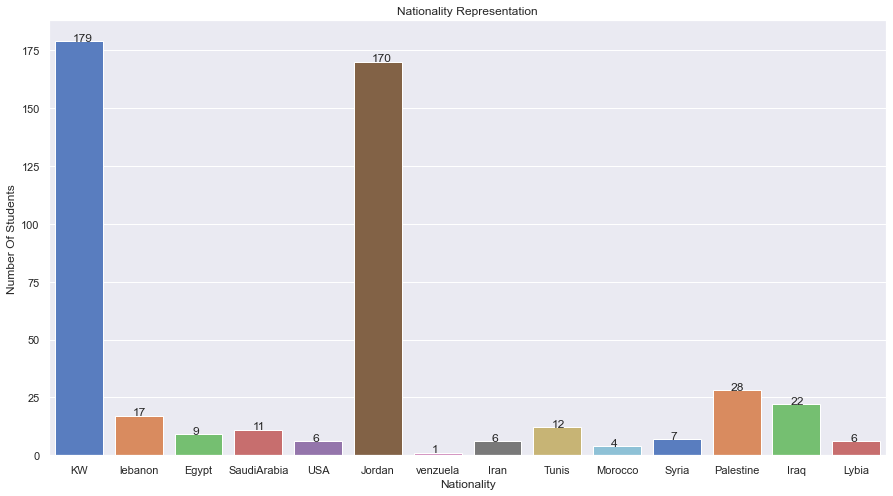

In [85]:
# Find out how many different nationalities and what they are
print("The different nationalities of students: ")
for n in df1['Nationality'].unique():
    print(n, end='\n')

# Countplot to help us visualise
plt.figure(figsize=(15,8))
h = sb.countplot(x='Nationality',data=df1, palette='muted')
h.set_title('Nationality Representation')
h.set(ylabel='Number Of Students')
for bar in h.patches:
    h.annotate('{:d}'.format(bar.get_height()), (bar.get_x()+0.30, bar.get_height()+0.15))

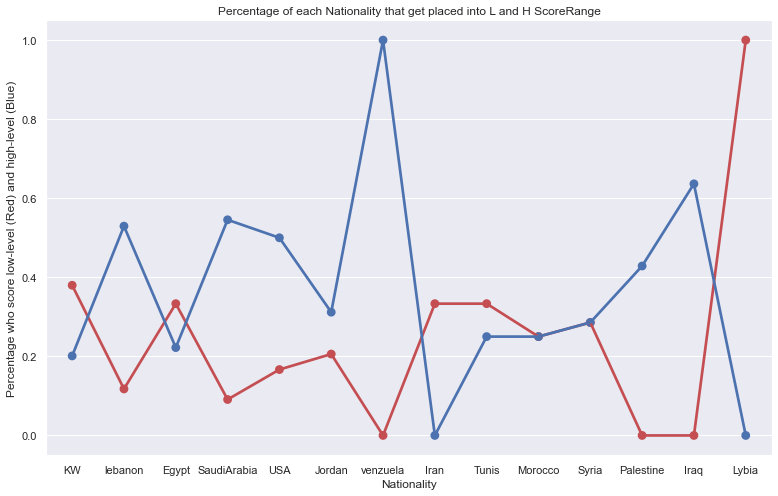

In [86]:
# Visualisation to see what percentage of each nationality get placed into L and H ScoreRange
df1['L'] = np.where(df1['ScoreRange'] == 'L', 1, 0)
df1['H'] = np.where(df1['ScoreRange'] == 'H', 1, 0)

f = plt.figure(figsize=(13,8))
g = sb.pointplot(x='Nationality', y='L', data=df1, color= 'r', ci=None)
f = sb.pointplot(x='Nationality', y='H', data=df1, color= 'b', ci=None)
g.set_ylabel("Percentage who score low-level (Red) and high-level (Blue)")
plt.title('Percentage of each Nationality that get placed into L and H ScoreRange')
plt.show()

# Drop the variables created
df1.drop(['L','H'], axis=1, inplace=True)

### Insights:  
> The pointplot shows us that the percentage of students who get placed into 'L' and 'H' differ greatly from nationality to nationality. </br>
> For example, Venezuelan students all place in 'H' ScoreRange and Lybian students all place in 'L' ScoreRange.</br>
> However this is due to the major imbalance in nationality, where majority of students come from Kuwait and Jordan.</br>
> This results in an inaccurate representation in the pointplot.

**Therefore**, due to the major imbalance in number of students of each nationality, we will drop 'Nationality' from our model.</br>

# PlaceOfBirth

The different PlaceOfBirth of students: 
KuwaIT
lebanon
Egypt
SaudiArabia
USA
Jordan
venzuela
Iran
Tunis
Morocco
Syria
Iraq
Palestine
Lybia


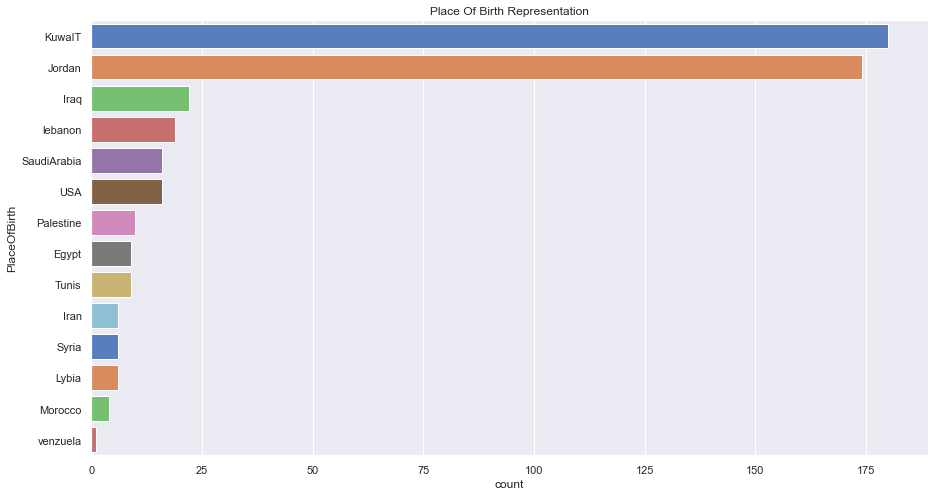

In [87]:
# Find out how many different PlaceOfBirth and what they are
print("The different PlaceOfBirth of students: ")
for n in df1['PlaceOfBirth'].unique():
    print(n, end='\n')

# Countplot to help us visualise
plt.figure(figsize=(15,8))
h = sb.countplot(y='PlaceOfBirth',data=df1, palette='muted', order= (df1['PlaceOfBirth'].value_counts().sort_values(ascending=False).index))
h.set_title('Place Of Birth Representation')
plt.show()

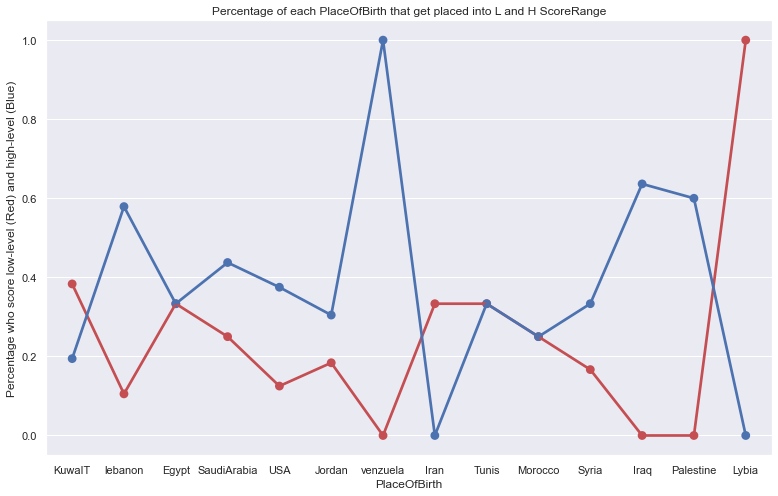

In [88]:
# Visualisation to see what percentage of each PlaceOfBirth get placed into L and H ScoreRange
df1['L'] = np.where(df1['ScoreRange'] == 'L', 1, 0)
df1['H'] = np.where(df1['ScoreRange'] == 'H', 1, 0)

f = plt.figure(figsize=(13,8))
g = sb.pointplot(x='PlaceOfBirth', y='L', data=df1, color= 'r', ci=None)
f = sb.pointplot(x='PlaceOfBirth', y='H', data=df1, color= 'b', ci=None)
g.set_ylabel("Percentage who score low-level (Red) and high-level (Blue)")
plt.title('Percentage of each PlaceOfBirth that get placed into L and H ScoreRange')
plt.show()

# Drop the variables created
df1.drop(['L','H'], axis=1, inplace=True)

### Insights:
> Similar to Nationality, there are extreme imbalances in the values of each PlaceOfBirth.</br>
> This results in an inaccurate representation of the data.

**Therefore**, the attribute PlaceOfBirth will be dropped as well.

# 2) Behavioral Predictor Variables
Now we will exclusively do EDA on **behavioral features** to examine their relationship with ScoreRange.</br>
Behavioral features include the following: </br>
>1)  RaisedHands              
>2)  VisitedResources         
>3)  AnnouncementsView     
>4)  Discussion 
>5)  StudentAbsenceDays 

In [89]:
# Create new DF with the relevant variables
BF_1 = pd.DataFrame(df1[['RaisedHands','VisitedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'ScoreRange']])

# Check DataTypes
BF_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   RaisedHands         478 non-null    int64 
 1   VisitedResources    478 non-null    int64 
 2   AnnouncementsView   478 non-null    int64 
 3   Discussion          478 non-null    int64 
 4   StudentAbsenceDays  478 non-null    object
 5   ScoreRange          478 non-null    object
dtypes: int64(4), object(2)
memory usage: 42.3+ KB


> Total of 4 numeric predictor variables and 1 categorical predictor variable.

In [90]:
# Get a statistical summary of the 4 numeric variables
print("Statistical summary of the numeric academic-related variables: ")
print(BF_1.describe())

Statistical summary of the numeric academic-related variables: 
       RaisedHands  VisitedResources  AnnouncementsView  Discussion
count   478.000000        478.000000         478.000000  478.000000
mean     46.887029         54.974895          38.014644   43.410042
std      30.787903         33.035071          26.623507   27.620961
min       0.000000          0.000000           0.000000    1.000000
25%      16.000000         20.000000          14.250000   20.000000
50%      50.000000         65.000000          33.000000   39.500000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


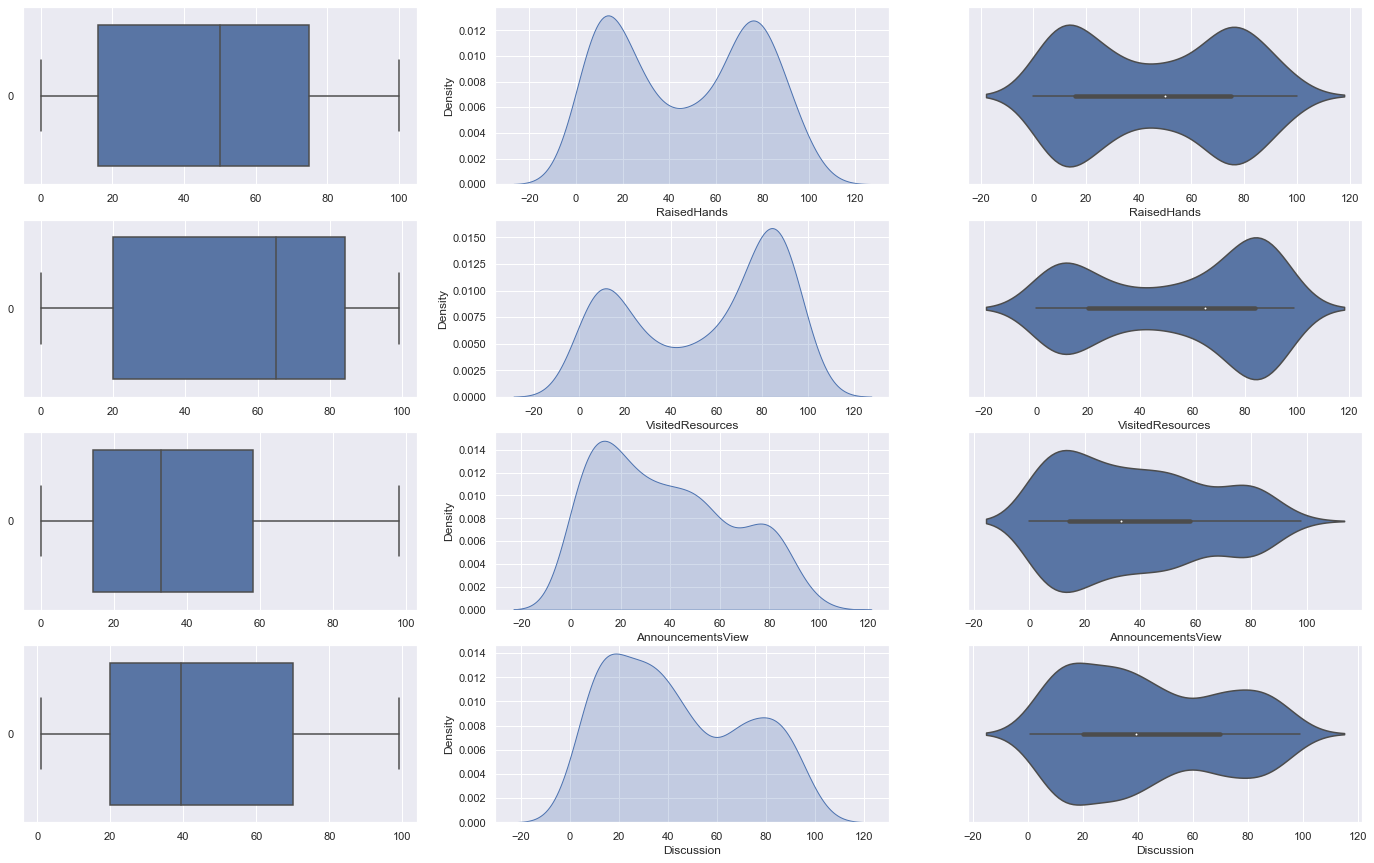

In [91]:
# Uni-variate visualisation of the 4 numeric data variables 

# Create Subplots
f, axes = plt.subplots(4, 3, figsize=(24, 15))

# Make a copy of the numeric data variables using another DF
BF_1_n = BF_1.drop(['ScoreRange','StudentAbsenceDays'], axis=1, inplace=False)

# Plot the basic uni-variate visualisation
count = 0
for var in BF_1_n:
    sb.boxplot(data = BF_1_n[var], orient = "h", ax = axes[count,0])
    sb.kdeplot(x=var, data = BF_1_n, ax = axes[count,1],shade=True)
    sb.violinplot(x=var, data=BF_1_n, ax = axes[count,2])
    count += 1

### Now to visualise the relationship between the 4 behavioral numeric variables and academic performance of students.

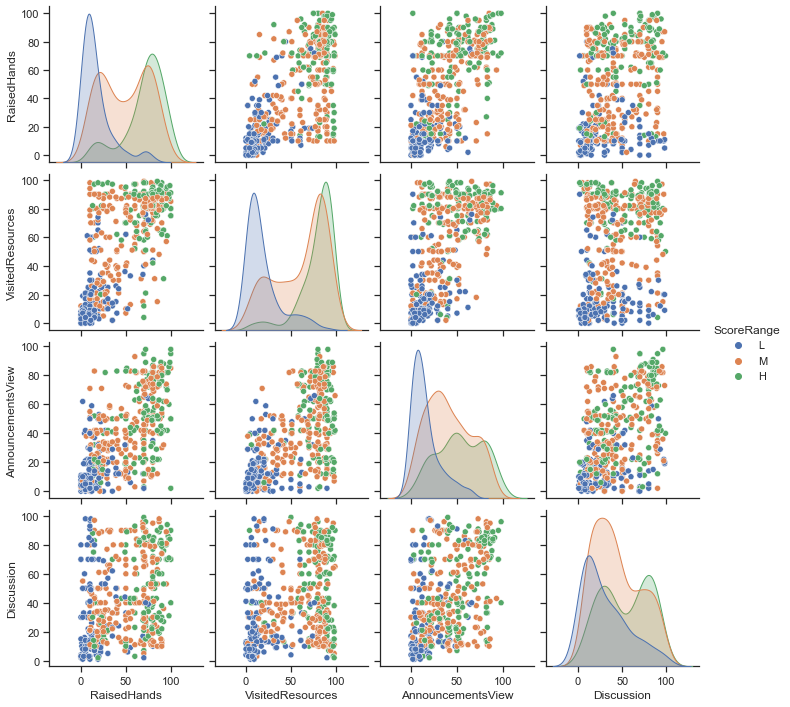

In [92]:
# Neat overviewing visualisation
sb.set(style="ticks")
sb.pairplot(BF_1, hue="ScoreRange", hue_order=['L','M','H'])
plt.show()

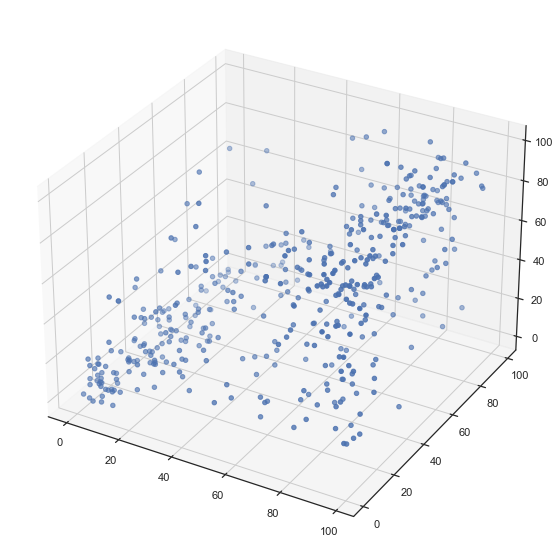

In [93]:
# Cool 3D Visualisation
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df1['VisitedResources'],df1['Discussion'], df1['RaisedHands'])
plt.show()

>- Each point represents a student with their respective scores for RaisedHands, VisitedResources and Discussion.

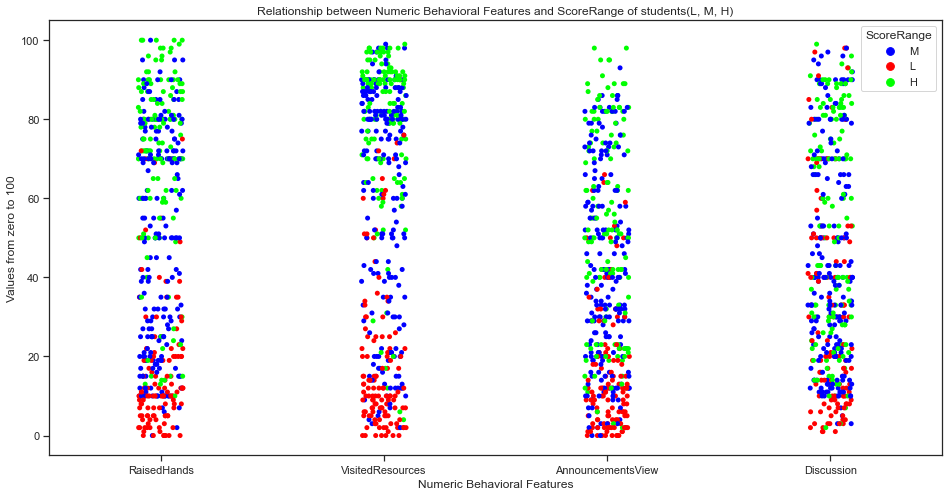

In [94]:
# Unpivot the dataframe using melt so that we can easily plot our visualisation
BF_melt = pd.melt(BF_1 ,id_vars='ScoreRange',value_vars=['RaisedHands','VisitedResources','AnnouncementsView', 'Discussion'])

# Use strip plot to visualise the r/s between the 4 numeric behavioral predictors and ScoreRange
f = plt.figure(figsize=(16, 8))
sb.stripplot(x='variable',y='value',hue='ScoreRange' , data=BF_melt,palette={'H':'lime','M':'blue','L':'red'})
plt.ylabel('Values from zero to 100')
plt.xlabel("Numeric Behavioral Features")
plt.title('Relationship between Numeric Behavioral Features and ScoreRange of students(L, M, H)')
plt.show()

### Insights: 
>- Students who raised hands and visted resources more were mostly of the higher ScoreRange.
>- In announcementsView and discussion, the trend is alot less apparent with the green points (H ScoreRange) being more spread out.
>- The red points (L ScoreRange) swarm at the bottom of the 4 features.

# Discussion

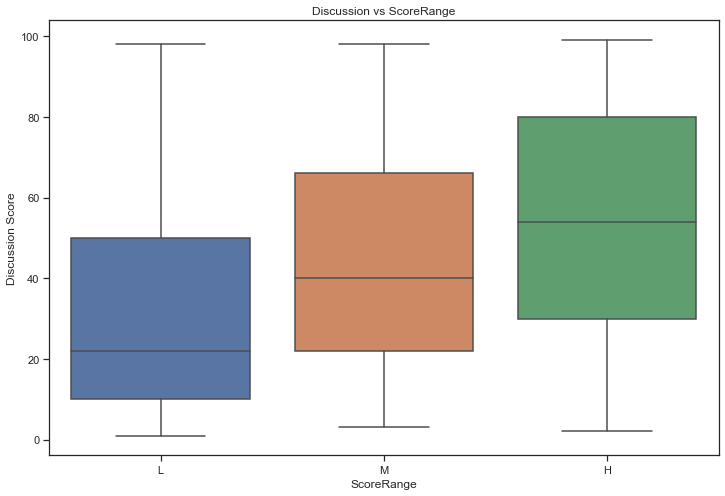

In [95]:
# Further analyse Discussion vs ScoreRange
f = plt.figure(figsize=(12,8))
sb.boxplot(x='ScoreRange', y='Discussion', data=BF_1, order=['L','M','H'])
plt.ylabel("Discussion Score")
plt.title("Discussion vs ScoreRange")
plt.show()

# AnnouncementViews

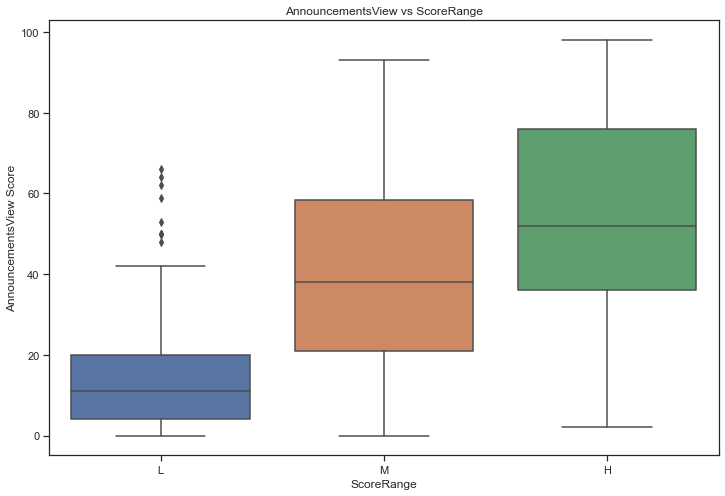

In [96]:
# Further analyse AnnouncementView vs ScoreRange
f = plt.figure(figsize=(12,8))
sb.boxplot(x='ScoreRange', y='AnnouncementsView', data=BF_1, order=['L','M','H'])
plt.ylabel("AnnouncementsView Score")
plt.title("AnnouncementsView vs ScoreRange")
plt.show()

### Insights:
>- Both Discussion and AnnouncementsViews have a clear positive impact on a student's ScoreRange.

**Therefore**, all 4 numeric behavioral predictors will be included in the model.

# StudentAbsenceDays

In [97]:
# Basic EDA on StudentAbsenceDays
BF_1['StudentAbsenceDays'].unique()

array(['Under-7', 'Above-7'], dtype=object)

>- Students are split into 2 categories, those who are absent for more than 7 days and under.

In [98]:
# Number of Students who are absent more/less than 7 days
print("Number of students absent more than 7 days:", BF_1[BF_1['StudentAbsenceDays']=='Above-7'].shape[0])
print("Number of students absent less than 7 days:", BF_1[BF_1['StudentAbsenceDays']=='Under-7'].shape[0])

Number of students absent more than 7 days: 189
Number of students absent less than 7 days: 289


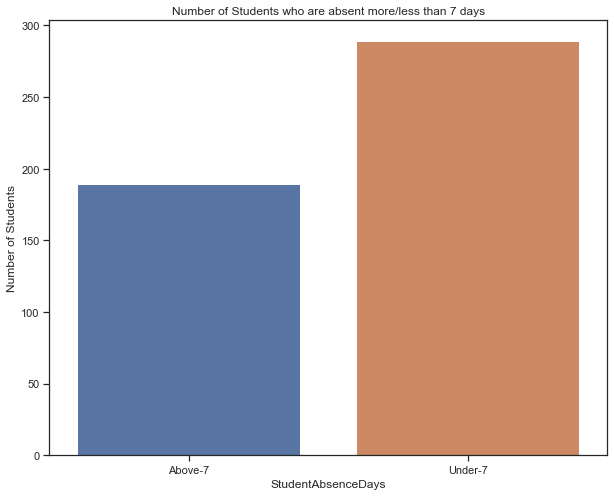

In [99]:
# Countplot of Semester
f = plt.figure(figsize=(10,8))
f = sb.countplot(x='StudentAbsenceDays', data=BF_1, order=['Above-7','Under-7'])
f.set(xlabel='StudentAbsenceDays', ylabel='Number of Students', title='Number of Students who are absent more/less than 7 days')
plt.show()

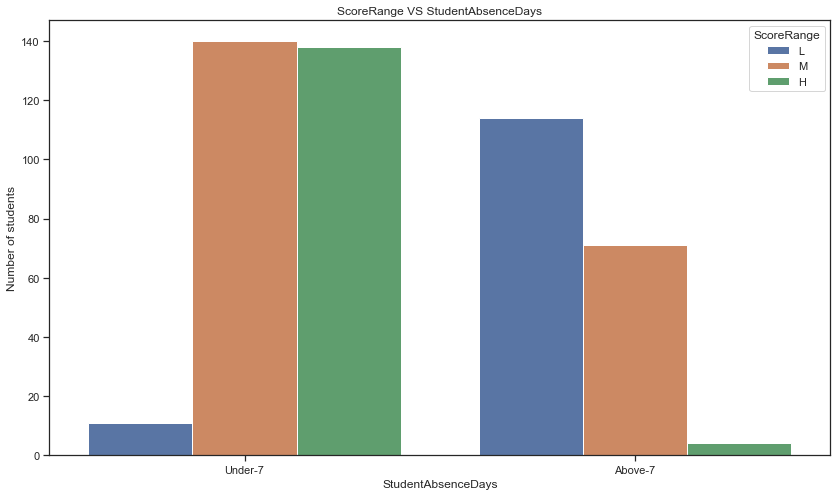

In [103]:
# Visualise their r/s
f = plt.figure(figsize=(14,8))
sb.countplot(x='StudentAbsenceDays',data = BF_1, hue='ScoreRange', hue_order=['L','M','H'])
plt.ylabel("Number of students")
plt.title("ScoreRange VS StudentAbsenceDays")
plt.show()

### As observed from the visualisation:
- There is a clear negative impact on the students academic class if students are more absent from school
- Barely any student who are absent for more than 7 days are in the best class
- Majority of students who are absent for less than 7 days are in H or M class

**Therefore** , all 5 behavioral features including StudentAbsenceDays are kept in our model.

# 3) Academic Predictor Variables
>Now we will exclusively do EDA on **academic features** to examine their relationship with ScoreRange.</br>
>These features include the following: </br>
1)   Topic </br>
2)   StageID  </br>                  
3)   GradeID    </br>                
4)   SectionID   </br>
5)   Semester             

In [ ]:
# Create new DF with relevant variables
AF_1 = pd.DataFrame(df1[['StageID','GradeID','SectionID','Topic','Semester','ScoreRange']])
AF_1

,StageID,GradeID,SectionID,Topic,Semester,ScoreRange
0,lowerlevel,G-04,A,IT,F,M
1,lowerlevel,G-04,A,IT,F,M
2,lowerlevel,G-04,A,IT,F,L
3,lowerlevel,G-04,A,IT,F,L
4,lowerlevel,G-04,A,IT,F,M
...,...,...,...,...,...,...
473,MiddleSchool,G-08,A,Chemistry,S,L
474,MiddleSchool,G-08,A,Geology,F,M
475,MiddleSchool,G-08,A,Geology,S,M
476,MiddleSchool,G-08,A,History,F,L


# Semester

In [ ]:
# Basic EDA on Semester
AF_1['Semester'].unique()

array(['F', 'S'], dtype=object)

>- Students are categorised into first and second semester students.

In [ ]:
# Number of Students in each Semester
print("Number of students in first semester:", AF_1[AF_1['Semester']=='F'].shape[0])
print("Number of students in second semester:", AF_1[AF_1['Semester']=='S'].shape[0])

Number of students in first semester: 244
Number of students in second semester: 234


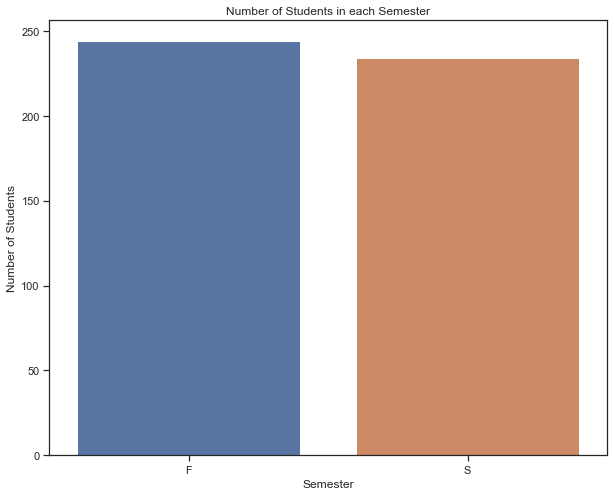

In [ ]:
# Countplot of Semester
f = plt.figure(figsize=(10,8))
f = sb.countplot(x='Semester', data=AF_1, order=['F','S'])
f.set(xlabel='Semester', ylabel='Number of Students', title='Number of Students in each Semester')
plt.show()

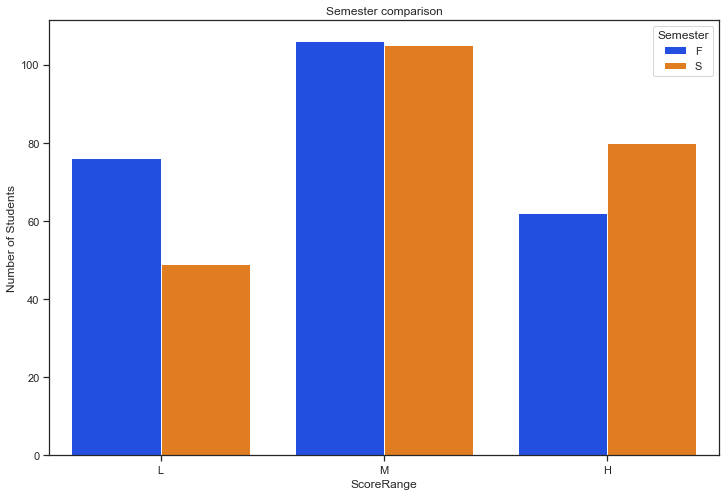

In [ ]:
# Semester comparison
f = plt.figure(figsize=(12,8))
f = sb.countplot(x='ScoreRange', hue='Semester', order=['L', 'M', 'H'], data=df1, palette='bright')
f.set(xlabel='ScoreRange', ylabel='Number of Students', title='Semester comparison')
plt.show()

### Insights:
>- Number of students from both semesters are roughly the same </br>
>- M ScoreRange number of student is the almost the same for both semester.</br>
>- However, the visualisation shows that students place in H more and place in L less for the 2nd semester.
>- Perhaps the second semester is easier than the first.

**Therefore**, semester will be included in our model.

# Topic

In [ ]:
# Basic EDA on Topic
AF_1['Topic'].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

>- 12 Topics in total

In [ ]:
# Cross tabulation between Topic and ScoreRange
CrosstabResult=pd.crosstab(index=AF_1['Topic'],columns=BF_1['ScoreRange'])
CrosstabResult

# Number of students in each Topic
sum=0
count=0
for topic in CrosstabResult.iloc:
    print("Number of students in " +  topic.name + " class:", topic.sum())
    sum += topic.sum()
    count+=1
avg_students = sum/count
print("\nAverage number of students per class:", avg_students)

Number of students in Arabic class: 59
Number of students in Biology class: 30
Number of students in Chemistry class: 24
Number of students in English class: 45
Number of students in French class: 63
Number of students in Geology class: 24
Number of students in History class: 19
Number of students in IT class: 95
Number of students in Math class: 21
Number of students in Quran class: 22
Number of students in Science class: 51
Number of students in Spanish class: 25

Average number of students per class: 39.833333333333336


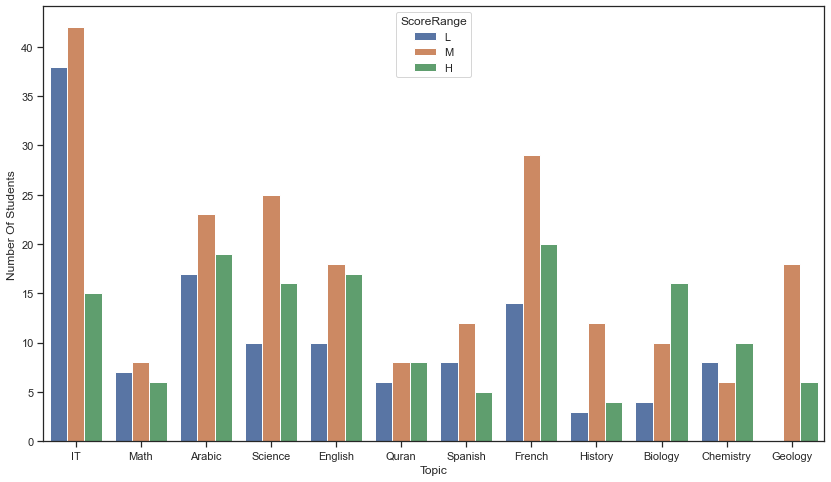

In [106]:
# Countplot of Topic
f = plt.figure(figsize=(14,8))
sb.countplot(x='Topic',data = AF_1, hue='ScoreRange', hue_order=['L','M','H'])
plt.ylabel('Number Of Students')
plt.show()

In [ ]:
# First convert the ScoreRanges  L, M, H into numerical values of -1,0 and 1 respectively
AF_1['SR_value'] = AF_1['ScoreRange'].map(dict(L=-1,M=0,H=1))
AF_1

,StageID,GradeID,SectionID,Topic,Semester,ScoreRange,SR_value
0,lowerlevel,G-04,A,IT,F,M,0
1,lowerlevel,G-04,A,IT,F,M,0
2,lowerlevel,G-04,A,IT,F,L,-1
3,lowerlevel,G-04,A,IT,F,L,-1
4,lowerlevel,G-04,A,IT,F,M,0
...,...,...,...,...,...,...,...
473,MiddleSchool,G-08,A,Chemistry,S,L,-1
474,MiddleSchool,G-08,A,Geology,F,M,0
475,MiddleSchool,G-08,A,Geology,S,M,0
476,MiddleSchool,G-08,A,History,F,L,-1


In [ ]:
# Mean numerical ScoreRange for each Topic
gb_topic = AF_1.groupby('Topic').mean()['SR_value'].sort_values()
print(gb_topic)

Topic
IT          -0.242105
Spanish     -0.120000
Math        -0.047619
Arabic       0.033898
History      0.052632
Chemistry    0.083333
Quran        0.090909
French       0.095238
Science      0.117647
English      0.155556
Geology      0.250000
Biology      0.400000
Name: SR_value, dtype: float64


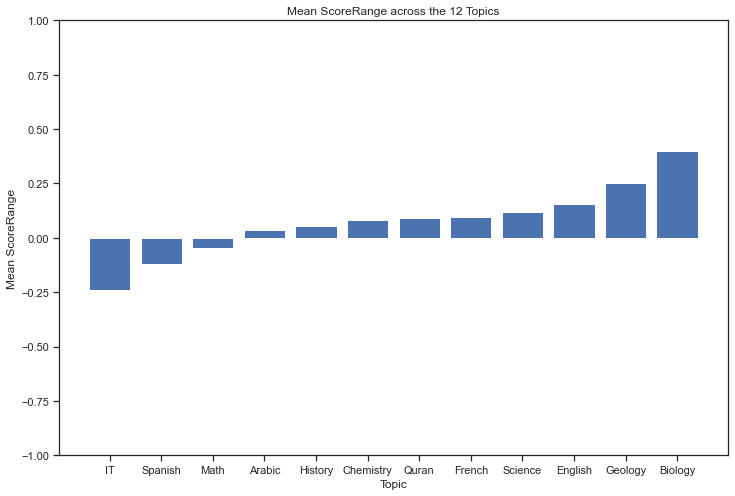

In [ ]:
# Plot the mean ScoreRange
f = plt.figure(figsize=(12,8))
f = plt.bar(gb_topic.index,gb_topic)
plt.title('Mean ScoreRange across the 12 Topics')
plt.ylim(ymin=-1,ymax=1) 
plt.xlabel('Topic')
plt.ylabel('Mean ScoreRange')
plt.show()

### Insights:
>- As seen from the EDA, IT has the most students but is harder than other topics.
>- Biology and Geology is significantly easier with 0 students in Geology placed in L ScoreRange.
>- Perhaps this is due to the different difficulties of each topic or presence of better teaching resources and staff in certain topics.

**Therefore**, subject topic will be included in our prediction model.

# SectionID

In [ ]:
# EDA on the different classrooms 'SectionID'
print("Different Sections of students:", AF_1['SectionID'].unique())

Different Sections of students: ['A' 'B' 'C']


In [ ]:
# Crosstabulation 
CrosstabResult=pd.crosstab(index=AF_1['SectionID'],columns=BF_1['ScoreRange'])
sum=0
count=0

# Number of students in each Section
for i in CrosstabResult.iloc:
    print("Number of students in " +  i.name + " classroom:", i.sum())
    sum += i.sum()
    count+=1


Number of students in A classroom: 281
Number of students in B classroom: 167
Number of students in C classroom: 30


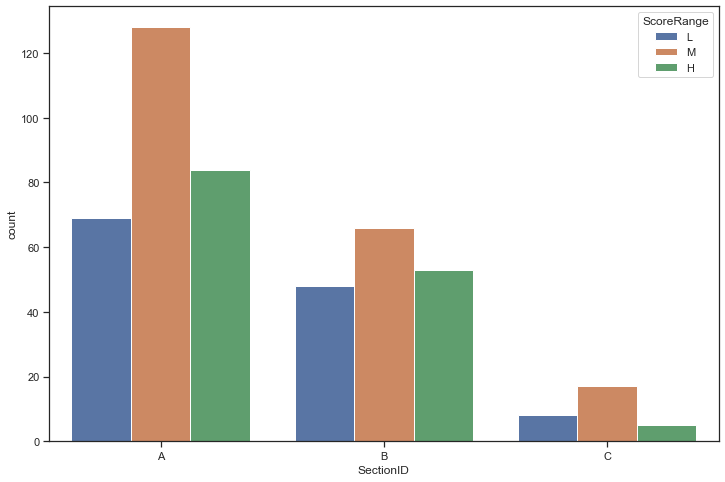

In [ ]:
# Distribution of ScoreRange across the 3 classrooms95
f = plt.figure(figsize=(12,8))
f = sb.countplot(x='SectionID', data=AF_1, hue='ScoreRange', hue_order=['L','M','H'])

In [ ]:
# Mean numerical ScoreRange for each SectionID
gb_SID = AF_1.groupby('SectionID').mean()['SR_value'].sort_values()
print(gb_SID)

SectionID
C   -0.100000
B    0.029940
A    0.053381
Name: SR_value, dtype: float64


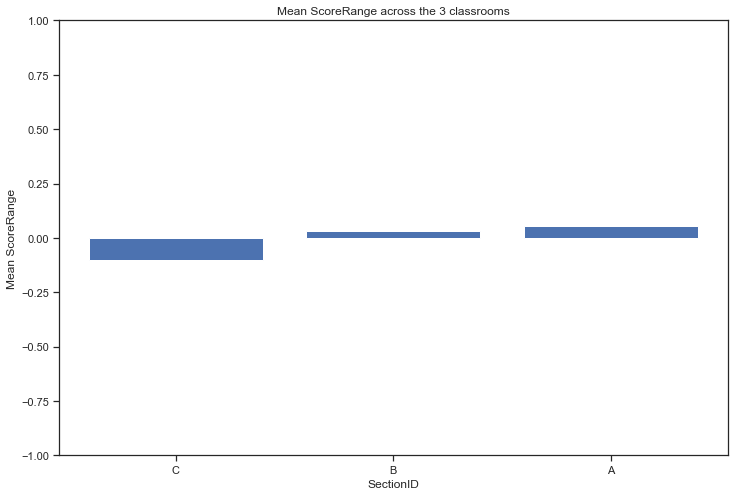

In [ ]:
# Plot the mean ScoreRange for each SectionID
f = plt.figure(figsize=(12,8))
f = plt.bar(gb_SID.index,gb_SID)
plt.ylim(ymin=-1,ymax=1) 
plt.title('Mean ScoreRange across the 3 classrooms')
plt.xlabel('SectionID')
plt.ylabel('Mean ScoreRange')
plt.show()

### Insights: 
>- Distribution of class-score (L, M or H) is similar throughout the different classrooms (A, B or C). </br>
>- Which class (A, B or C) does not seem to have any impact on students class-score (L, M or H).</br>

**Therefore**, we will not include SectionID in our model.

# StageID

In [ ]:
# Basic EDA on StageID
print("Different educations stages of students:", AF_1['StageID'].unique())

Different educations stages of students: ['lowerlevel' 'MiddleSchool' 'HighSchool']


In [ ]:
# CrossTabulation
CrosstabResult=pd.crosstab(index=AF_1['StageID'],columns=BF_1['ScoreRange'])

# Number of Students per StageID
sum=0
count=0
for i in CrosstabResult.iloc:
    print("Number of students in " +  i.name + " Stage:", i.sum())
    sum += i.sum()
    count+=1


Number of students in HighSchool Stage: 33
Number of students in MiddleSchool Stage: 248
Number of students in lowerlevel Stage: 197


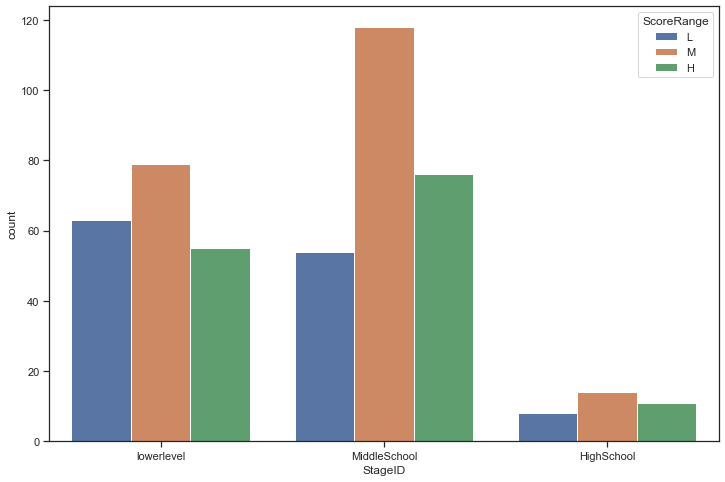

In [ ]:
# CountPlot of StageID
f = plt.figure(figsize=(12,8))
f = sb.countplot(x='StageID', data=AF_1, hue='ScoreRange', hue_order=['L','M','H'])

In [ ]:
# Mean numerical ScoreRange for each StageID
gb_SID2 = AF_1.groupby('StageID').mean()['SR_value'].sort_values()
print(gb_SID2)

StageID
lowerlevel     -0.040609
MiddleSchool    0.088710
HighSchool      0.090909
Name: SR_value, dtype: float64


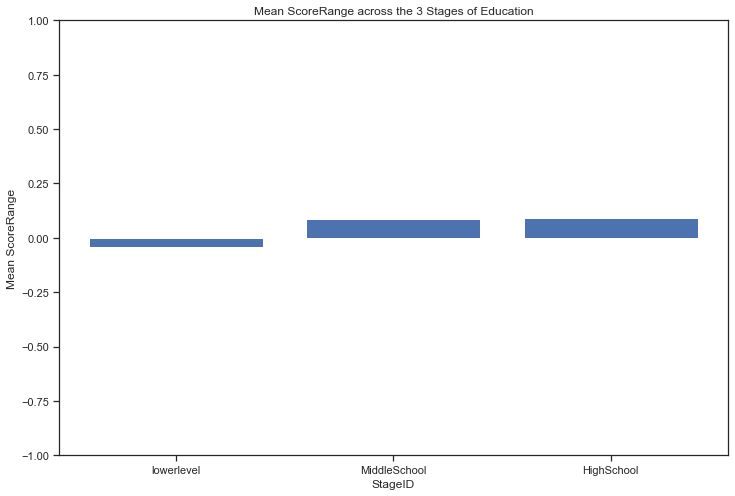

In [ ]:
# Plot the mean ScoreRange for each StageID
f = plt.figure(figsize=(12,8))
f = plt.bar(gb_SID2.index,gb_SID2)
plt.ylim(ymin=-1,ymax=1) 
plt.title('Mean ScoreRange across the 3 Stages of Education')
plt.xlabel('StageID')
plt.ylabel('Mean ScoreRange')
plt.show()

### Insights:
>- The distribution of classes are similar throughout all 3 stages.</br>
>- Similarly to SectionID, StageID does not seem to have any impact on class (L, M or H). </br>

**Therefore**, StageID will not be included in our prediction model.

# GradeID

In [ ]:
# Basic EDA on GradeID
print("Different grades of students:", AF_1['GradeID'].unique())

Different grades of students: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']


>- 10 grades in total from G-02 to G-12.

In [ ]:
# CrossTabulation
CrosstabResult=pd.crosstab(index=AF_1['GradeID'],columns=BF_1['ScoreRange'])

# Number of students in each grade.
sum=0
count=0
for i in CrosstabResult.iloc:
    print("Number of students in " +  i.name + " Grade:", i.sum())
    sum += i.sum()
    count+=1

Number of students in G-02 Grade: 145
Number of students in G-04 Grade: 48
Number of students in G-05 Grade: 3
Number of students in G-06 Grade: 32
Number of students in G-07 Grade: 101
Number of students in G-08 Grade: 116
Number of students in G-09 Grade: 5
Number of students in G-10 Grade: 4
Number of students in G-11 Grade: 13
Number of students in G-12 Grade: 11


[Text(0.5, 0, 'Number of Students'),
 Text(0, 0.5, 'GradeID'),
 Text(0.5, 1.0, 'Number of students across the grades')]

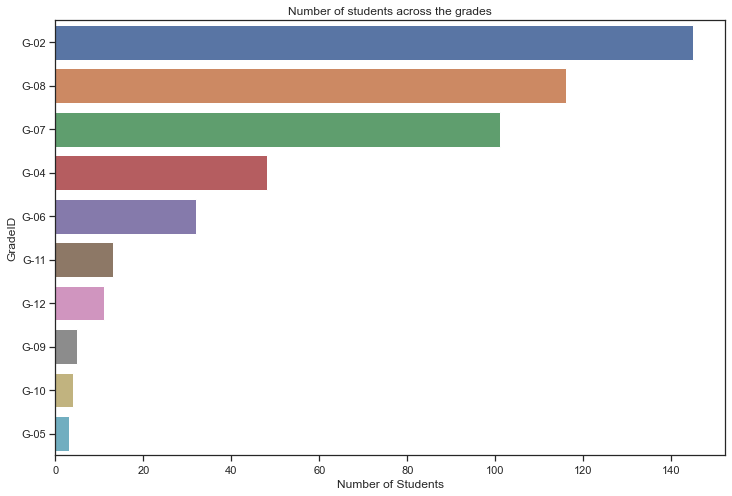

In [ ]:
# Countplot to visualise distribution of students across the grades
f = plt.figure(figsize=(12,8))
f = sb.countplot(y='GradeID', data=AF_1, order=(AF_1['GradeID'].value_counts().sort_values(ascending=False).index))
f.set(xlabel='Number of Students', ylabel='GradeID', title='Number of students across the grades')

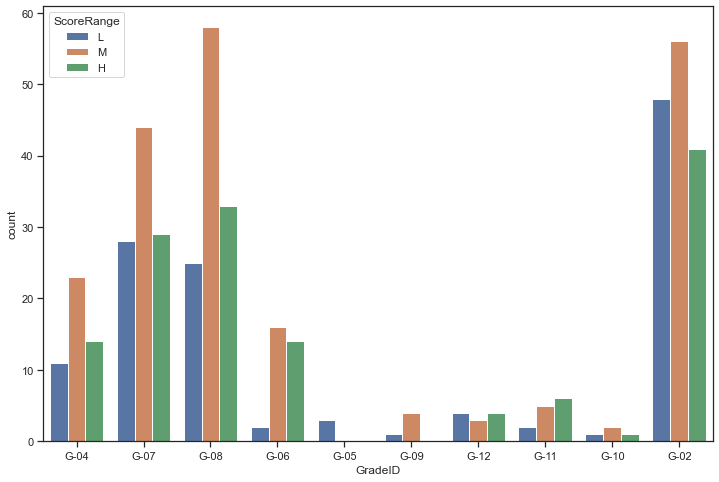

In [ ]:
# CountPlot to visualise distribution of ScoreRange
f = plt.figure(figsize=(12,8))
f = sb.countplot(x='GradeID', data=AF_1, hue='ScoreRange', hue_order=['L','M','H'])
plt.show()

In [ ]:
# Mean numerical ScoreRange for each GradeID
gb_GID = AF_1.groupby('GradeID').mean()['SR_value'].sort_values()
print(gb_GID)

GradeID
G-05   -1.000000
G-09   -0.200000
G-02   -0.048276
G-10    0.000000
G-12    0.000000
G-07    0.009901
G-04    0.062500
G-08    0.068966
G-11    0.307692
G-06    0.375000
Name: SR_value, dtype: float64


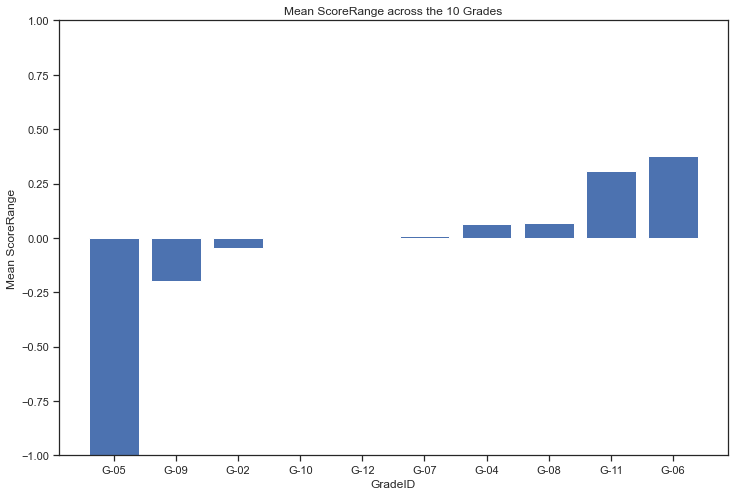

In [ ]:
# Plot the mean ScoreRange for each StageID
f = plt.figure(figsize=(12,8))
f = plt.bar(gb_GID.index,gb_GID)
plt.ylim(ymin=-1,ymax=1) 
plt.title('Mean ScoreRange across the 10 Grades')
plt.xlabel('GradeID')
plt.ylabel('Mean ScoreRange')
plt.show()

### Insights: 
>- Extreme imbalance in number of students in each grade. </br>
>- Lack of students from G-05 to G-10. </br>
>- Inaccurate representation of certain grades because of lack of student datapoints.

**Therefore**, we have decided not to include GradeID as well in our prediction model.

# 4) Parental Predictor Variables
Now we will exclusively do EDA on **parental features** to examine their relationship with ScoreRange.</br>
These features include the following: </br>
>1) Relation </br>
>2) ParentAnsweringSurvey</br>
>3) ParentSchoolSatisfaction </br>

In [ ]:
# Create new DF with relevant Variables
PF_1 = pd.DataFrame(df1[['Relation','ParentAnsweringSurvey','ParentschoolSatisfaction']])
PF_1

,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction
0,Father,Yes,Good
1,Father,Yes,Good
2,Father,No,Bad
3,Father,No,Bad
4,Father,No,Bad
...,...,...,...
473,Father,No,Bad
474,Father,No,Bad
475,Father,No,Bad
476,Father,No,Bad


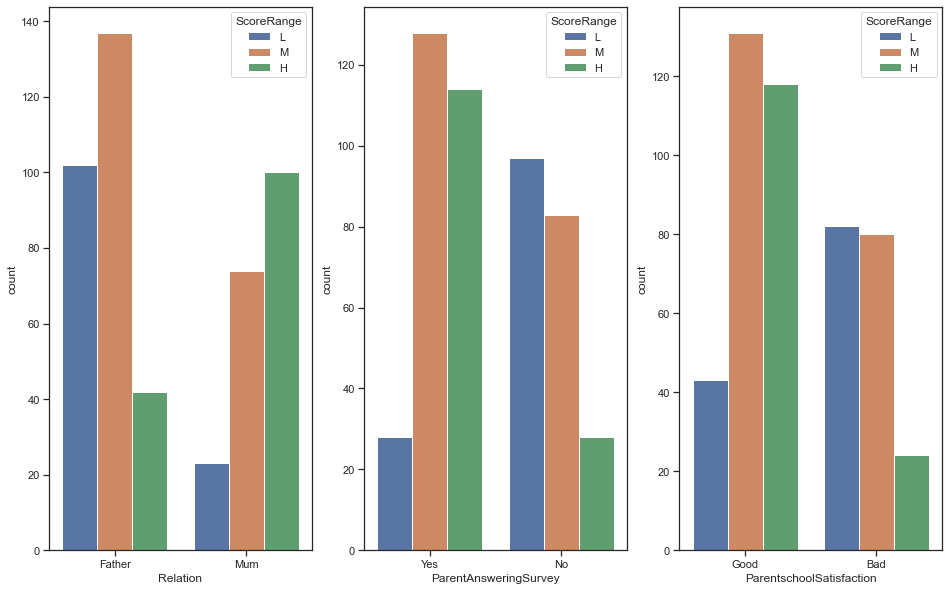

In [ ]:
# Overview visualisation
f, axes = plt.subplots(1, 3, figsize=(16, 10))
count = 0
for var in PF_1:
    sb.countplot(x=var, data=PF_1, hue=df1['ScoreRange'],ax = axes[count], hue_order=['L','M', 'H'])
    count+=1

In [ ]:
PF_1 = pd.DataFrame(df1[['Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','ScoreRange']])

# First convert the ScoreRanges  L, M, H into numerical values of -1,0 and 1 respectively
PF_1['SR_value'] = PF_1['ScoreRange'].map(dict(L=-1,M=0,H=1))
PF_1.head()

,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,ScoreRange,SR_value
0,Father,Yes,Good,M,0
1,Father,Yes,Good,M,0
2,Father,No,Bad,L,-1
3,Father,No,Bad,L,-1
4,Father,No,Bad,M,0


In [ ]:
for i in PF_1.iloc[:,0:3]:
    print (i)

Relation
ParentAnsweringSurvey
ParentschoolSatisfaction


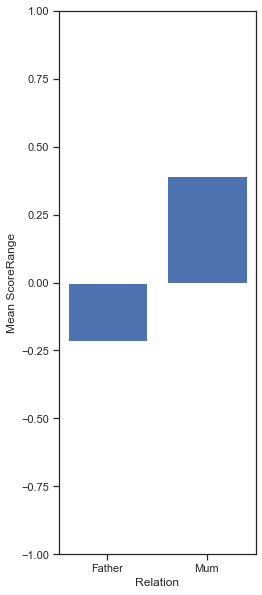

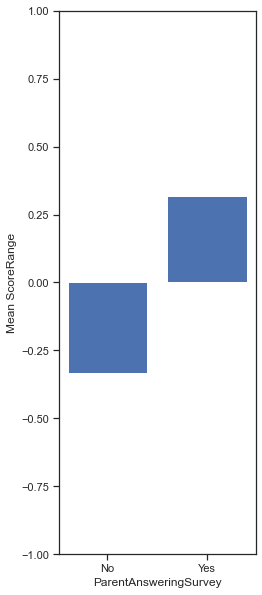

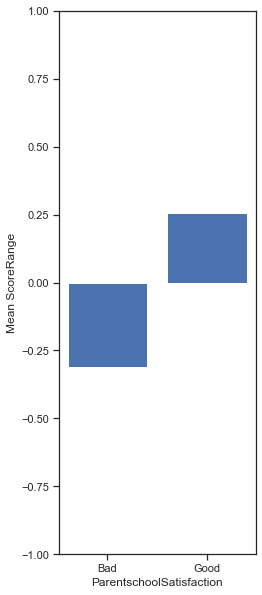

In [ ]:
# Visualisation
i=0
for var in PF_1.iloc[:,0:3]:
    # Mean numerical ScoreRange 
    gb_var = PF_1.groupby(var).mean()['SR_value'].sort_values()
    
    # Plot the mean ScoreRange for each variable and its categories
    fig = plt.figure(figsize=(12,10))
    ax1 = plt.subplot2grid((1,3),(0,i))
    f = plt.bar(gb_var.index,gb_var)
    plt.ylim(ymin=-1,ymax=1)
    plt.xlabel(var)
    plt.ylabel('Mean ScoreRange')
    plt.show()
    i += 1

### Insights:

>- All 3 factors affect ScoreRange.
>- For Relation, students with their Mum in charge perform much better.
>- Both ParentschoolSatisfaction and ParentAnsweringSurvey has a positive relationship with ScoreRange as well.

**Therefore**, all three parental features will be kept in our prediction model.

# Dropping unwanted predictors

In [ ]:
# Dropping of unwanted variables and creating a new clean dataframe
df1_cleaned = df1.drop(['Nationality','PlaceOfBirth','StageID','GradeID','SectionID'], axis=1, inplace=False)
df1_cleaned

,Gender,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,ScoreRange
0,M,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...
473,F,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
474,F,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
475,F,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
476,F,History,F,Father,30,17,14,57,No,Bad,Above-7,L
